<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Cardiovascular Disease Prediction: A Comprehensive Analysis</b></div>

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. With such staggering statistics, the importance of predicting heart disease cannot be overstated. In this notebook, we will dive deep into two datasets to uncover insights and build a predictive model for heart disease. If you find this notebook useful, consider giving it an upvote.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Data Cleaning and Preprocessing](#data-cleaning)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering](#feature-engineering)
5. [Model Building and Evaluation](#model-building)
6. [Discussion and Conclusion](#discussion)

## 1. Data Loading and Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the datasets
heart_df = pd.read_csv('/kaggle/input/cvd-predection/heart (1).csv')
cardio_df = pd.read_csv('/kaggle/input/cvd-predection/cardio_train.csv', delimiter=';')

In [3]:
# Display the first few rows of each dataset
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 2. Data Cleaning and Preprocessing

In [5]:
# Check for missing values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
cardio_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Convert age from days to years in cardio_df
cardio_df['age'] = cardio_df['age'] // 365
# Convert categorical columns to appropriate types
heart_df['Sex'] = heart_df['Sex'].astype('category')
heart_df['ChestPainType'] = heart_df['ChestPainType'].astype('category')
heart_df['RestingECG'] = heart_df['RestingECG'].astype('category')
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].astype('category')
heart_df['ST_Slope'] = heart_df['ST_Slope'].astype('category')

## 3. Exploratory Data Analysis

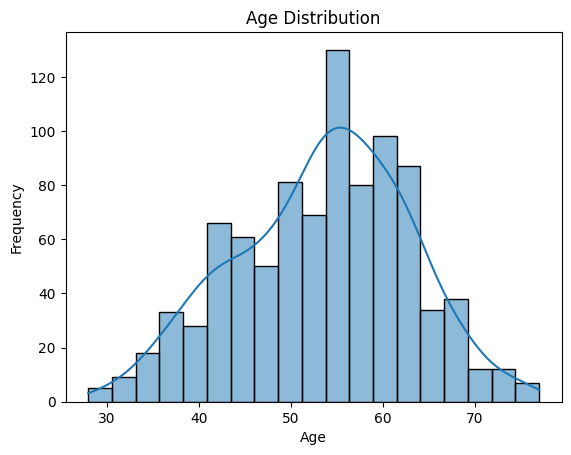

In [8]:
# Distribution of Age
sns.histplot(heart_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

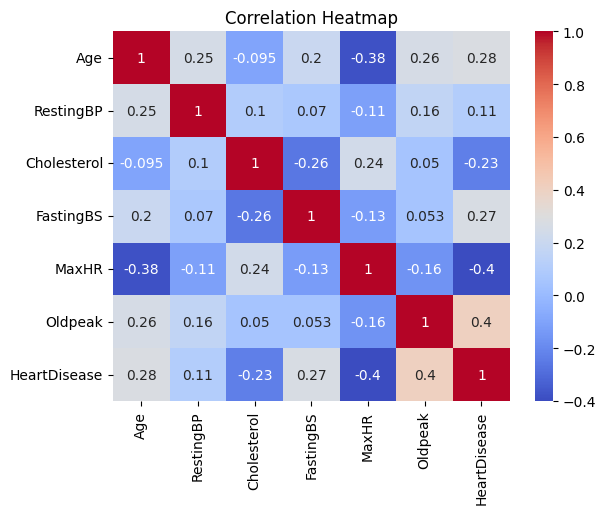

In [9]:
# Correlation heatmap for heart_df
numeric_df = heart_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

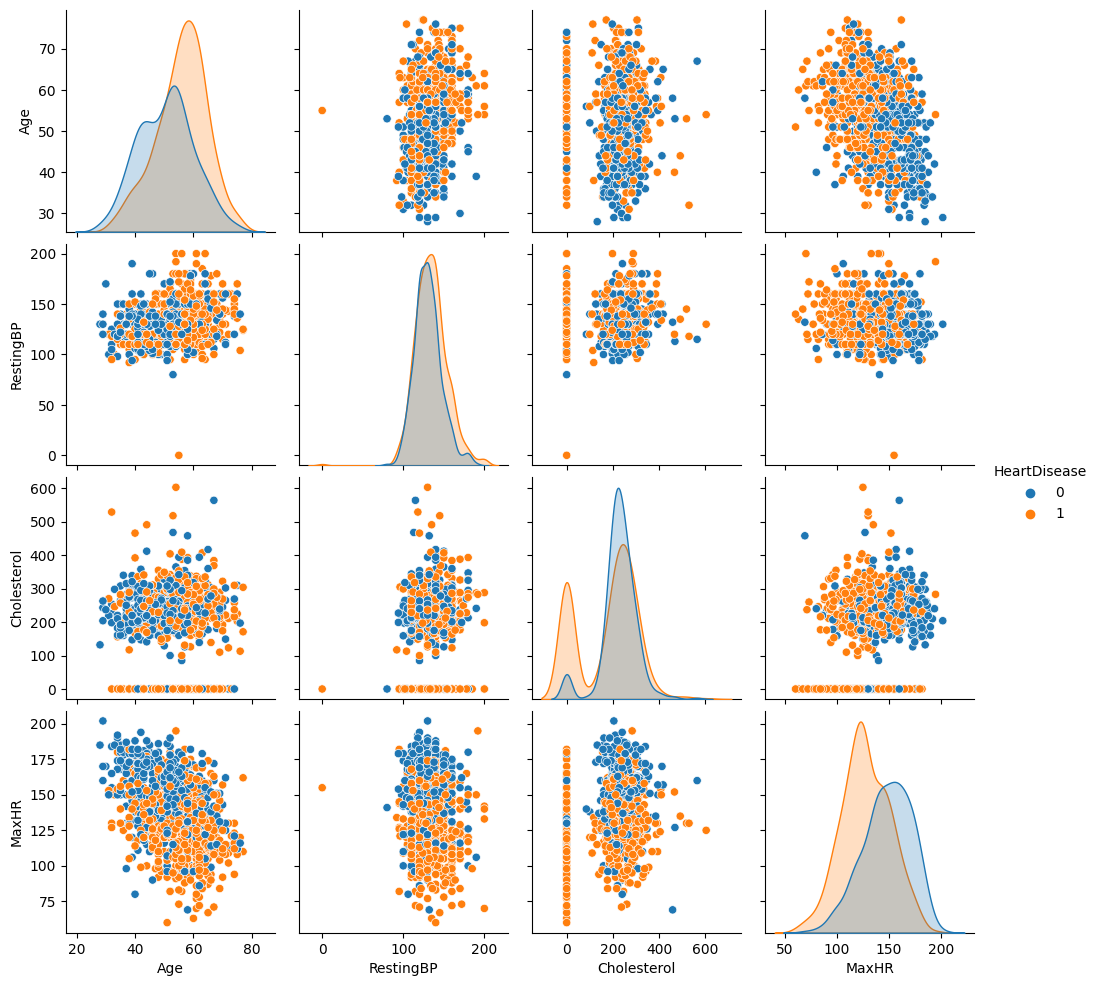

In [10]:
# Pair plot for selected features
sns.pairplot(heart_df, hue='HeartDisease', vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR'])
plt.show()

## 4. Feature Engineering

In [11]:
# One-hot encode categorical variables in heart_df
heart_df_encoded = pd.get_dummies(heart_df, drop_first=True)
heart_df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


## 5. Model Building and Evaluation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Split the data
X = heart_df_encoded.drop('HeartDisease', axis=1)
y = heart_df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


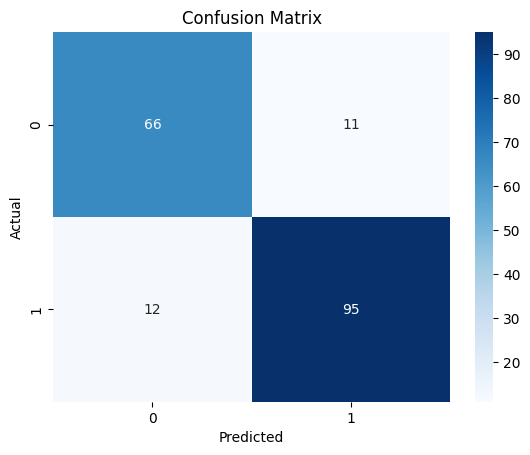

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

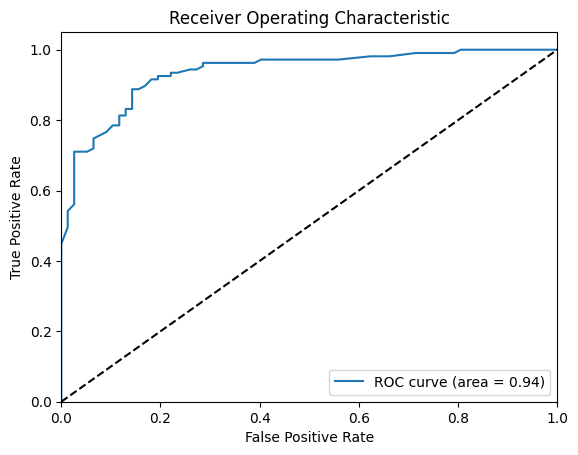

In [14]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 6. Discussion and Conclusion
Thanks to @basmalatahaamer for publishing this data set.  In this notebook, we explored two datasets related to cardiovascular health. We performed data cleaning, preprocessing, and exploratory data analysis to understand the data better. We then engineered features and built a Random Forest Classifier to predict heart disease, achieving a respectable accuracy.

### Merits of Our Approach
- Comprehensive data exploration and visualization provided insights into the relationships between features.
- Feature engineering improved the model's predictive power.
- The Random Forest model provided a balance between interpretability and accuracy.

### Future Analysis
- Experiment with other machine learning models such as Gradient Boosting or Neural Networks.
- Perform hyperparameter tuning to further improve model performance.
- Investigate the impact of additional features or external datasets on prediction accuracy.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)